In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

# EDA

### DATASET PREPARATION

In [3]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China 2019-09-09          2019   
1                            United Kingdom 2016-09-09          2016   
2                             United States 2018-09-08          2013   
3                             United States 2018-09-08          2016   
4                             United States 2017-09-08          2017   

     rating duration                           listed_in  \
0     TV-PG       90  Children & Family Movies, Comedies   
1     TV-MA       94                     Stand-Up Comedy   
2  TV-Y7-FV                                     Kids' TV   
3     TV-Y7                                     Kids' TV   
4     TV-14       99                            Comedies   

                                         description  year_added  month_added  \
0  Before planning an awesome wedding for his gra...      2019.0          9.0   
1  Jandino Asporaat riffs on the challenges of ra...      2016.0          9.0   
2  With the help of three human allies, the Autob...      2018.0          9.0   
3  When a prison ship crash unleashes hundreds of...      2018.0          9.0   
4  When nerdy high schooler Dani finally attracts...      2017.0          9.0   

  season_count  
0               
1               
2            1  
3            1  
4

In [4]:
df.describe(include='all')

show_id   type        title                director  \
count   6.234000e+03   6234         6234                    4265   
unique           NaN      2         6172                    3301   
top              NaN  Movie  The Silence  Raúl Campos, Jan Suter   
freq             NaN   4265            3                      18   
first            NaN    NaN          NaN                     NaN   
last             NaN    NaN          NaN                     NaN   
mean    7.670368e+07    NaN          NaN                     NaN   
std     1.094296e+07    NaN          NaN                     NaN   
min     2.477470e+05    NaN          NaN                     NaN   
25%     8.003580e+07    NaN          NaN                     NaN   
50%     8.016337e+07    NaN          NaN                     NaN   
75%     8.024489e+07    NaN          NaN                     NaN   
max     8.123573e+07    NaN          NaN                     NaN   

                      cast        country           date_added  release_year  \
count                 5664           5758                 6223    6234.00000   
unique                5469            554                 1189           NaN   
top     David Attenborough  United States  2020-01-01 00:00:00           NaN   
freq                    18           2032                  126           NaN   
first                  NaN            NaN  2008-01-01 00:00:00           NaN   
last                   NaN            NaN  2020-01-18 00:00:00           NaN   
mean                   NaN            NaN                  NaN    2013.35932   
std                    NaN            NaN                  NaN       8.81162   
min                    NaN            NaN                  NaN    1925.00000   
25%                    NaN            NaN                  NaN    2013.00000   
50%                    NaN            NaN                  NaN    2016.00000   
75%                    NaN            NaN                  NaN    2018.00000   
max                    NaN            NaN                  NaN    2020.00000   

       rating duration      listed_in  \
count    6224     6234           6234   
unique     14      187            461   
top     TV-MA           Documentaries   
freq     2027     1969            299   
first     NaN      NaN            NaN   
last      NaN      NaN            NaN   
mean      NaN      NaN            NaN   
std       NaN      NaN            NaN   
min       NaN      NaN            NaN   
25%       NaN      NaN            NaN   
50%       NaN      NaN            NaN   
75%       NaN      NaN            NaN   
max       NaN      NaN            NaN   

                                              description   year_added  \
count                                                6234  6223.000000   
unique                                               6226          NaN   
top     A surly septuagenarian gets another chance at ...          NaN   
freq                                                    3          NaN   
first                                                 NaN          NaN   
last                                                  NaN          NaN   
mean                                                  NaN  2017.983288   
std                                                   NaN     1.204851   
min                                                   NaN  2008.000000   
25%                                                   NaN  2017.000000   
50%                                                   NaN  2018.000000   
75%                                                   NaN  2019.000000   
max                                                   NaN  2020.000000   

        month_added season_count  
count   6223.000000         6234  
unique          NaN           16  
top             NaN               
freq            NaN         4265  
first           NaN          NaN  
last            NaN          NaN  
mean       6.837538          NaN  
std        3.621890          NaN  
min        1

In [5]:
# Shape of the data.
df.shape

(6234, 15)

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
year_added        11
month_added       11
season_count       0
dtype: int64

### CONTENT TYPE ON NETFLIX

In [7]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

The above plot shows that 2/3rd of the content on Netflix is movies and remaining 32% of them are TV Shows. 

### GROWTH IN CINTENT OVER THE YEARS

In [8]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

The growth in number of movies on netflix is much higher than that od TV shows. About 1300 new movies were added in both 2018 and 2019. The growth in content started from 2013. Netflix kept on adding different movies and tv shows on its platform over the years. This content was of different variety - content from different countries, content which was released over the years.

### ORGINIAL RELEASE YEAR OF MOVIES

In [9]:
col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

### IN WHICH MONTH, THE CONTENT IS ADDED THE MOST

In [10]:
col = 'month_added'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="In which month, the conent is added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

### OLDEST MOVIES ON NETFLIX

In [11]:
small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:20]

title  release_year
2011                                    Prelude to War          1942
2013                              The Battle of Midway          1942
2022     Undercover: How to Operate Behind Enemy Lines          1943
2023                Why We Fight: The Battle of Russia          1943
2026                   WWII: Report from the Aleutians          1943
2017  The Memphis Belle: A Story of a\nFlying Fortress          1944
2019                                 The Negro Soldier          1944
2021                                  Tunisian Victory          1944
2012                                        San Pietro          1945
2009                          Nazi Concentration Camps          1945
2005                           Know Your Enemy - Japan          1945
2930                                      The Stranger          1946
2006                                Let There Be Light          1946
2020                                       Thunderbolt          1947
2981                                   White Christmas          1954
1401                             Rebel Without a Cause          1955
1369                                  Forbidden Planet          1956
1371                                              Gigi          1958
1354                             Cat on a Hot Tin Roof          1958
713                                              Ujala          1959

### OLDEST TV SHOWS ON NETFLIX

In [12]:
small = df.sort_values("release_year", ascending = True)
small = small[small['season_count'] != ""]
small[['title', "release_year"]][:20]

title  release_year
4292    Pioneers: First Women Filmmakers*          1925
4079  Pioneers of African-American Cinema          1946
5981  The Twilight Zone (Original Series)          1963
5980               The Andy Griffith Show          1967
5704                            Star Trek          1968
614      Monty Python's Fliegender Zirkus          1972
5669         Monty Python's Flying Circus          1974
5830                           Dad's Army          1977
4273                             El Chavo          1979
4369                        Ninja Hattori          1981
982                              Robotech          1985
6016                          Saint Seiya          1986
3473                           Shaka Zulu          1986
5774                    Highway to Heaven          1988
369                             High Risk          1988
1681    The Super Mario Bros. Super Show!          1989
6094                  Pee-wee's Playhouse          1990
3864             Ken Burns: The Civil War          1990
5982                           Twin Peaks          1990
2761       Bob Ross: Beauty Is Everywhere          1991

### DISTRIBUTION OF MOVIE DURATION

In [13]:
import plotly.figure_factory as ff
x1 = d2['duration'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

### TV SHOWS WITH MANY SEASONS

In [14]:
col = 'season_count'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="Seasons", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

display(df[df['season_count'] == '15'][['title','director', 'cast','country','release_year']])

title director  \
5908  Grey's Anatomy      NaN   
5974            NCIS      NaN   

                                                   cast        country  \
5908  Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...  United States   
5974  Mark Harmon, Michael Weatherly, Pauley Perrett...  United States   

      release_year  
5908          2018  
5974          2017

#### GREY'S ANATOMY and NCIS have the highest number of seasons on NETFLIX

### RATINGS OF THE CONTENT

In [15]:
col = "rating"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

### TOP CATEGORIES

In [16]:
from collections import Counter
col = "listed_in"
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

### TOP ACTORS ON NETFLIX WITH MOST MOVIES

In [17]:
def country_trace(country, flag = "movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()

In [18]:
small = df[df["type"] == "Movie"]
small = small[small["country"] == "India"]

col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="orange"))

data = [trace1]
layout = go.Layout(title="Movie Directors from India with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [19]:
small = df[df["type"] == "Movie"]
small = small[small["country"] == "United States"]

col = "director"
categories = ", ".join(small[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(12)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="orange"))

data = [trace1]
layout = go.Layout(title="Movie Directors from US with most content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

### Standup comedies on Netflix

In [20]:
tag = "Stand-Up Comedy"
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
small = df[df["relevant"] == 1]
small[small["country"] == "United States"][["title", "country","release_year"]].head(20)

title        country  \
53                                Marc Maron: Too Real  United States   
113                                  Def Comedy Jam 25  United States   
126                        Jeff Dunham: Beside Himself  United States   
134                  Iliza Shlesinger: Confirmed Kills  United States   
181                              Jerry Before Seinfeld  United States   
202    Sebastian Maniscalco: What's Wrong with People?  United States   
210        Cedric the Entertainer: Live from the Ville  United States   
260                          Norm Macdonald Has a Show  United States   
288                     Jeff Dunham: Relative Disaster  United States   
289                           Daniel Sloss: Live Shows  United States   
419                        Iliza Shlesinger: War Paint  United States   
424                              Mo Amer: The Vagabond  United States   
427                            Deon Cole: Cole Hearted  United States   
433                      Russell Peters: Almost Famous  United States   
470  Judah Friedlander: America Is the Greatest Cou...  United States   
490            Rodney Carrington: Here Comes the Truth  United States   
492                       Arsenio Hall: Smart & Classy  United States   
510                             Beyond Stranger Things  United States   
559                            ADAM SANDLER 100% FRESH  United States   
565                          Jenny Slate: Stage Fright  United States   

     release_year  
53           2017  
113          2017  
126          2019  
134          2016  
181          2017  
202          2012  
210          2016  
260          2018  
288          2017  
289          2018  
419          2013  
424          2018  
427          2019  
433          2016  
470          2017  
490          2017  
492          2019  
510          2017  
559          2018  
565          2019

In [21]:
tag = "Stand-Up Comedy"
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
small = df[df["relevant"] == 1]
small[small["country"] == "India"][["title", "country","release_year"]].head(10)

title country  release_year
2937  Aditi Mittal: Things They Wouldn't Let Me Say   India          2017
5420                              Gangs of Hassepur   India          2014

In [22]:
display(df[df['season_count'] == '15'][['title','director', 'cast','country','release_year']])

title director  \
5908  Grey's Anatomy      NaN   
5974            NCIS      NaN   

                                                   cast        country  \
5908  Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...  United States   
5974  Mark Harmon, Michael Weatherly, Pauley Perrett...  United States   

      release_year  
5908          2018  
5974          2017

### COUNTRIES WITH MOST CONTENT

In [23]:
temp_df = df['country'].value_counts().reset_index()[:20]


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['country'],
                marker = dict(color = 'rgb(25,20,253)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'TOP 20 COUNTIES WITH MOST CONTENT' , xaxis = dict(title = 'Countries'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### Wordcloud for Genres

In [28]:
from collections import Counter

genres=list(df['listed_in'])
gen=[]
for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

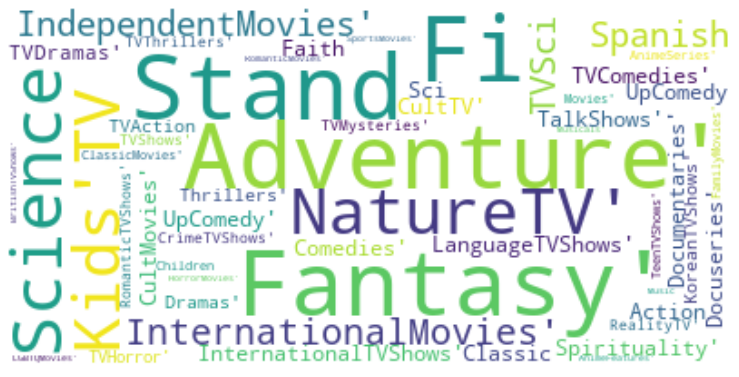

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

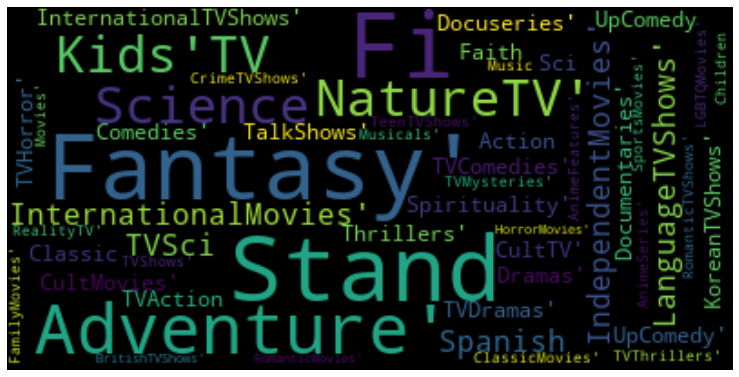

In [30]:
text = list(set(gen))

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## Recommendation System

### Content-based Flitering

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(6234, 16151)

* This means that there are about 16151 words described for the 6234 movies in this dataset.

***Using the Cosine similarity since it is independent of the magnitude and is relatively easy and fast to calculate***

In [33]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [34]:
indices = pd.Series(df.index, index = df['title']).drop_duplicates()

In [37]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [54]:
get_recommendations('Peaky Blinders')

296                     Our Godfather
4491                              Don
2015                         The Fear
4852    Jonathan Strange & Mr Norrell
1231                       The Prison
3737                Power Rangers Zeo
5986                       The Tudors
1753      Once Upon a Time in Mumbaai
5494     The Legend of Michael Mishra
1142                  Shelby American
Name: title, dtype: object

In [45]:
get_recommendations('Dark')

3891                Altered Carbon
150                         Maniac
3939                     Candyflip
4315    Black Mirror: Bandersnatch
3524                     Inception
1821                Kia and Cosmos
868                   Jagga Jasoos
1853                     Love Rain
521                       Shirkers
2524                         ANIMA
Name: title, dtype: object

In [55]:
# Filling null values
filled_na = df.fillna('')
filled_na.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                             
2                             
3                             
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country           date_added  \
0  United States, India, South Korea, China  2019-09-09 00:00:00   
1                            United Kingdom  2016-09-09 00:00:00   
2                             United States  2018-09-08 00:00:00   
3                             United States  2018-09-08 00:00:00   
4                             United States  2017-09-08 00:00:00   

   release_year    rating duration                           listed_in  \
0          2019     TV-PG       90  Children & Family Movies, Comedies   
1          2016     TV-MA       94                     Stand-Up Comedy   
2          2013  TV-Y7-FV                                     Kids' TV   
3          2016     TV-Y7                                     Kids' TV   
4          2017     TV-14       99                            Comedies   

                                         description year_added month_added  \
0  Before planning an awesome wedding for his gra...       2019           9   
1  Jandino Asporaat riffs on the challenges of ra...       2016           9   
2  With the help of three human allies, the Autob...       2018           9   
3  When a prison ship crash unleashes hundreds of...       2018           9   
4  When nerdy high schooler Dani finally attracts...       2017           9   

  season_count  from_us  relevant  
0                     0         0  
1                     0         1  
2            1        0         0  
3            1        0         0  
4                     0         0

In [56]:
# Making all the words lower-case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [58]:
# Features on which the model is to be filtered
features=['title','director','cast','listed_in','description']
filled_na=filled_na[features]

In [60]:
for feature in features:
    filled_na[feature] = filled_na[feature].apply(clean_data)
    
filled_na.head()

title               director  \
0  normofthenorth:kingsizedadventure  richardfinn,timmaltby   
1            jandino:whateverittakes                          
2                  transformersprime                          
3      transformers:robotsindisguise                          
4                       #realityhigh        fernandolebrija   

                                                cast  \
0  alanmarriott,andrewtoth,briandobson,colehoward...   
1                                    jandinoasporaat   
2  petercullen,sumaleemontano,frankwelker,jeffrey...   
3  willfriedle,darrencriss,constancezimmer,kharyp...   
4  nestacooper,katewalsh,johnmichaelhiggins,keith...   

                        listed_in  \
0  children&familymovies,comedies   
1                  stand-upcomedy   
2                         kids'tv   
3                         kids'tv   
4                        comedies   

                                         description  
0  beforeplanninganawesomeweddingforhisgrandfathe...  
1  jandinoasporaatriffsonthechallengesofraisingki...  
2  withthehelpofthreehumanallies,theautobotsoncea...  
3  whenaprisonshipcrashunleasheshundredsofdecepti...  
4  whennerdyhighschoolerdanifinallyattractstheint...

In [61]:
# Creating a Bag of Words model
def create_bow(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filled_na['bow'] = filled_na.apply(create_bow, axis=1)

From here on, the code is basically similar to the upper model except the fact that count vectorizer is used instead of tfidf.

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(filled_na['bow'])

cosine_sim_2 = cosine_similarity(cv_matrix, cv_matrix)

In [63]:
filled_na = filled_na.reset_index()
indices = pd.Series(filled_na.index, index=filled_na['title'])

In [64]:
def get_recommendations_new(title, cosine_sim = cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [66]:
get_recommendations_new('Ozark', cosine_sim_2)

1967    The Assassination of Gianni Versace
5614                          The Blacklist
6160                           Breaking Bad
4084           The Lizzie Borden Chronicles
5873                    Designated Survivor
3817                               Unsolved
5930                              Kakegurui
6114                                 Wanted
1459                             Get Shorty
4726                               Sintonia
Name: title, dtype: object

In [68]:
get_recommendations_new('You', cosine_sim_2)

5615     Beauty & the Beast
1652       Sotus The Series
3817               Unsolved
5923    Pyaar Tune Kya Kiya
560           Here to Heart
955                  Sudden
4440      Twice Upon A Time
6114                 Wanted
1459             Get Shorty
1643        Kiss The Series
Name: title, dtype: object

In [74]:
get_recommendations_new('The Irishman', cosine_sim_2)

4153                      The Irishman: In Conversation
3081                                        Taxi Driver
817                                         Raging Bull
3043                                       Mean Streets
2706                                     Righteous Kill
3032                    Alice Doesn't Live Here Anymore
3091                    Who's That Knocking at My Door?
4894                                  Gangs of New York
202     Sebastian Maniscalco: What's Wrong with People?
3857                                          Paddleton
Name: title, dtype: object

In [80]:
get_recommendations_new('Breaking Bad', cosine_sim_2)

5850                       Better Call Saul
1967    The Assassination of Gianni Versace
5614                          The Blacklist
6137                                  Ozark
4084           The Lizzie Borden Chronicles
5873                    Designated Survivor
3817                               Unsolved
5930                              Kakegurui
6114                                 Wanted
1459                             Get Shorty
Name: title, dtype: object

In [81]:
get_recommendations_new('The Departed', cosine_sim_2)

2857                             Mojave
3081                        Taxi Driver
1190                      The Rainmaker
3636                              Trash
3490                Catch Me If You Can
3589            The Talented Mr. Ripley
4894                  Gangs of New York
3799                            반드시 잡는다
758     El Camino: A Breaking Bad Movie
1086                         The Island
Name: title, dtype: object

In [82]:
get_recommendations_new('Blue Valentine', cosine_sim_2)

5518               Dare to Be Wild
1740    The Place Beyond the Pines
1696         Two Lovers and a Bear
4147                      Blue Jay
5338                    Paper Year
5397                         Porto
2014                 The Discovery
4060                       Newness
4087                  Entanglement
4909                    Concussion
Name: title, dtype: object